In [86]:
import os
os.chdir(r"c:\Users\britt\Desktop\YH\Applicerad AI\job_discrimination")
import warnings

import gensim
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [87]:
warnings.simplefilter("ignore")

In [88]:
df = pd.read_csv("data/cleaned_data/bulletins_w_labels_and_content.csv", dtype={'ID': object})  
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [89]:
X = df["Cleaned text"]

In [6]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

count_vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
count_vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))

tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(2, 2))
tfidf_vectorizer_trigrams = TfidfVectorizer(ngram_range=(3, 3))

In [7]:
X_count = count_vectorizer.fit_transform(X).toarray()
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

X_count_bigrams = count_vectorizer_bigrams.fit_transform(X).toarray()
X_count_trigrams = count_vectorizer_trigrams.fit_transform(X).toarray()

X_tfidf_bigrams = tfidf_vectorizer_bigrams.fit_transform(X).toarray()
X_tfidf_trigrams = tfidf_vectorizer_trigrams.fit_transform(X).toarray()

In [8]:
y_70_30 = df["Numeric label 70/30"]
y_60_40 = df["Numeric label 60/40"]

In [9]:
trials_dictionaries = []

In [10]:
def objective(trial):
    X = X_count
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [11]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:39:25,515] A new study created in memory with name: no-name-4dc160ea-178c-4fff-b7f9-5a5629ddde69
[I 2023-01-05 15:39:25,972] Trial 0 finished with value: 0.7777777777777778 and parameters: {'C': 0.0023603870716551135, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7777777777777778.
[I 2023-01-05 15:39:26,598] Trial 1 finished with value: 0.8 and parameters: {'C': 0.11711763767638256, 'c_weight': None}. Best is trial 1 with value: 0.8.
[I 2023-01-05 15:39:26,679] Trial 2 finished with value: 0.7333333333333333 and parameters: {'C': 5.380379909792166e-06, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.8.
[I 2023-01-05 15:39:27,122] Trial 3 finished with value: 0.7777777777777778 and parameters: {'C': 1.7626473122688404, 'c_weight': None}. Best is trial 1 with value: 0.8.
[I 2023-01-05 15:39:27,571] Trial 4 finished with value: 0.8 and parameters: {'C': 0.0826043600261953, 'c_weight': None}. Best is trial 1 with value: 0.8.
[I 2023-01-05 15:39:27,969] Tria

In [12]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [13]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [14]:
trials_dict = {
    "X": "X_count", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_count, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count, y_70_30
Score: 0.822
Best parameters: {'C': 0.004463999318142082, 'c_weight': None}
F1: 0.861
Recall: 0.822
Precision: 0.903


In [15]:
def objective(trial):
    X = X_count
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [16]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:40:57,356] A new study created in memory with name: no-name-d294826f-e94e-4095-a138-65773b2d3cfe
[I 2023-01-05 15:40:57,558] Trial 0 finished with value: 0.7333333333333333 and parameters: {'C': 3.807978763854315e-06, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:40:57,768] Trial 1 finished with value: 0.7111111111111111 and parameters: {'C': 0.00016252749597201127, 'c_weight': None}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:40:57,797] Trial 2 finished with value: 0.4444444444444444 and parameters: {'C': 1.0578772907272273e-07, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:40:58,237] Trial 3 finished with value: 0.7777777777777778 and parameters: {'C': 0.01967548314705681, 'c_weight': 'balanced'}. Best is trial 3 with value: 0.7777777777777778.
[I 2023-01-05 15:40:58,649] Trial 4 finished with value: 0.7555555555555555 and parameters: {'C': 0.0047393457240171

In [17]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [18]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [19]:
trials_dict = {
    "X": "X_count", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_count, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count, y_60_40
Score: 0.778
Best parameters: {'C': 0.01967548314705681, 'c_weight': 'balanced'}
F1: 0.832
Recall: 0.778
Precision: 0.934


In [20]:
def objective(trial):
    X = X_tfidf
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [21]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:41:37,567] A new study created in memory with name: no-name-f1bf86ac-da91-46bc-bd2c-4cd950dae10d
[I 2023-01-05 15:41:37,590] Trial 0 finished with value: 0.7777777777777778 and parameters: {'C': 1.4657572220249388e-06, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7777777777777778.
[I 2023-01-05 15:41:37,724] Trial 1 finished with value: 0.8222222222222222 and parameters: {'C': 0.0006807585976650901, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.8222222222222222.
[I 2023-01-05 15:41:37,758] Trial 2 finished with value: 0.8222222222222222 and parameters: {'C': 0.0019543890265000335, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.8222222222222222.
[I 2023-01-05 15:41:37,778] Trial 3 finished with value: 0.7777777777777778 and parameters: {'C': 1.5350414183387317e-06, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.8222222222222222.
[I 2023-01-05 15:41:37,847] Trial 4 finished with value: 0.6444444444444445 and parameters: {'C': 6.85716583

In [22]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [23]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [24]:
trials_dict = {
    "X": "X_tfidf", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params,
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf, y_70_30
Score: 0.844
Best parameters: {'C': 1.1837327769050559, 'c_weight': 'balanced'}
F1: 0.884
Recall: 0.844
Precision: 0.927


In [25]:
def objective(trial):
    X = X_tfidf
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [26]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:41:46,349] A new study created in memory with name: no-name-a0ab80b2-96d2-44dd-834d-fe616e66709e
[I 2023-01-05 15:41:46,368] Trial 0 finished with value: 0.6666666666666666 and parameters: {'C': 3.773622342124919e-07, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.6666666666666666.
[I 2023-01-05 15:41:46,399] Trial 1 finished with value: 0.7111111111111111 and parameters: {'C': 0.007687405221856861, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.7111111111111111.
[I 2023-01-05 15:41:46,582] Trial 2 finished with value: 0.7111111111111111 and parameters: {'C': 1.549531326561036e-07, 'c_weight': None}. Best is trial 1 with value: 0.7111111111111111.
[I 2023-01-05 15:41:46,664] Trial 3 finished with value: 0.7111111111111111 and parameters: {'C': 1.1757280105159666e-05, 'c_weight': None}. Best is trial 1 with value: 0.7111111111111111.
[I 2023-01-05 15:41:46,697] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 0.013422148861331702, 'c

In [27]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [28]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [29]:
trials_dict = {
    "X": "X_tfidf", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")


X_tfidf, y_60_40
Score: 0.733
Best parameters: {'C': 2.808264906198739, 'c_weight': None}
F1: 0.825
Recall: 0.733
Precision: 0.962


In [30]:
def objective(trial):
    X = X_count_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [31]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:41:59,699] A new study created in memory with name: no-name-4f9304ed-5d1a-4f68-a330-ac4a817e3afa
[I 2023-01-05 15:42:00,340] Trial 0 finished with value: 0.6444444444444445 and parameters: {'C': 4.1558017738627425e-05, 'c_weight': None}. Best is trial 0 with value: 0.6444444444444445.
[I 2023-01-05 15:42:01,880] Trial 1 finished with value: 0.7333333333333333 and parameters: {'C': 2.658139117506866, 'c_weight': None}. Best is trial 1 with value: 0.7333333333333333.
[I 2023-01-05 15:42:02,619] Trial 2 finished with value: 0.6444444444444445 and parameters: {'C': 2.5925162950135724e-07, 'c_weight': None}. Best is trial 1 with value: 0.7333333333333333.
[I 2023-01-05 15:42:03,496] Trial 3 finished with value: 0.6666666666666666 and parameters: {'C': 0.0016207374952249374, 'c_weight': None}. Best is trial 1 with value: 0.7333333333333333.
[I 2023-01-05 15:42:03,713] Trial 4 finished with value: 0.3111111111111111 and parameters: {'C': 5.429481474555776e-07, 'c_weight': 'ba

In [32]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [33]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [34]:
trials_dict = {
    "X": "X_count_bigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_bigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_bigrams, y_70_30
Score: 0.756
Best parameters: {'C': 0.021742030856276674, 'c_weight': 'balanced'}
F1: 0.793
Recall: 0.756
Precision: 0.835


In [35]:
def objective(trial):
    X = X_count_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [36]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:44:32,229] A new study created in memory with name: no-name-924826e9-155c-49f0-bd87-a0fe6609ff86
[I 2023-01-05 15:44:32,697] Trial 0 finished with value: 0.6222222222222222 and parameters: {'C': 9.96118137066208e-06, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.6222222222222222.
[I 2023-01-05 15:44:34,328] Trial 1 finished with value: 0.7555555555555555 and parameters: {'C': 0.34241669171545736, 'c_weight': None}. Best is trial 1 with value: 0.7555555555555555.
[I 2023-01-05 15:44:35,114] Trial 2 finished with value: 0.7111111111111111 and parameters: {'C': 3.926579553071433e-05, 'c_weight': None}. Best is trial 1 with value: 0.7555555555555555.
[I 2023-01-05 15:44:36,066] Trial 3 finished with value: 0.7111111111111111 and parameters: {'C': 1.1743727049675105e-06, 'c_weight': None}. Best is trial 1 with value: 0.7555555555555555.
[I 2023-01-05 15:44:37,966] Trial 4 finished with value: 0.7333333333333333 and parameters: {'C': 0.022376679238114785, 'c_weight'

In [37]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [38]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [39]:
trials_dict = {
    "X": "X_count_bigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_bigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_bigrams, y_60_40
Score: 0.778
Best parameters: {'C': 1.1129198295932472, 'c_weight': 'balanced'}
F1: 0.829
Recall: 0.778
Precision: 0.918


In [40]:
def objective(trial):
    X = X_count_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [41]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:47:06,881] A new study created in memory with name: no-name-d6289db0-edc9-4dba-b806-1a17b6910627
[I 2023-01-05 15:47:07,190] Trial 0 finished with value: 0.4 and parameters: {'C': 3.9359473010263787e-07, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.4.
[I 2023-01-05 15:47:07,557] Trial 1 finished with value: 0.4 and parameters: {'C': 2.3144919142793357e-07, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.4.
[I 2023-01-05 15:47:08,318] Trial 2 finished with value: 0.6888888888888889 and parameters: {'C': 6.5493451638935255e-06, 'c_weight': 'balanced'}. Best is trial 2 with value: 0.6888888888888889.
[I 2023-01-05 15:47:10,794] Trial 3 finished with value: 0.7333333333333333 and parameters: {'C': 0.017718293195691612, 'c_weight': None}. Best is trial 3 with value: 0.7333333333333333.
[I 2023-01-05 15:47:12,033] Trial 4 finished with value: 0.7333333333333333 and parameters: {'C': 0.003756904325324986, 'c_weight': 'balanced'}. Best is trial 3 with value: 0

In [42]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [43]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [44]:
trials_dict = {
    "X": "X_count_trigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_trigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_trigrams, y_70_30
Score: 0.733
Best parameters: {'C': 0.017718293195691612, 'c_weight': None}
F1: 0.779
Recall: 0.733
Precision: 0.854


In [45]:
def objective(trial):
    X = X_count_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [46]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:50:27,525] A new study created in memory with name: no-name-0f988c36-6cd7-4292-be89-a7a36762e403
[I 2023-01-05 15:50:28,506] Trial 0 finished with value: 0.7111111111111111 and parameters: {'C': 1.9264521581976698e-07, 'c_weight': None}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 15:50:29,280] Trial 1 finished with value: 0.7111111111111111 and parameters: {'C': 5.6885799190162916e-05, 'c_weight': None}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 15:50:31,028] Trial 2 finished with value: 0.7333333333333333 and parameters: {'C': 0.06290657794518263, 'c_weight': None}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-01-05 15:50:32,699] Trial 3 finished with value: 0.7111111111111111 and parameters: {'C': 0.004127910932743262, 'c_weight': None}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-01-05 15:50:33,508] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 9.548143032957275e-05, 'c_weight': No

In [47]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_count_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [48]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [49]:
trials_dict = {
    "X": "X_count_trigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_count_trigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_count_trigrams, y_60_40
Score: 0.756
Best parameters: {'C': 0.16980096929560476, 'c_weight': None}
F1: 0.827
Recall: 0.756
Precision: 0.962


In [50]:
def objective(trial):
    X = X_tfidf_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [51]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:53:55,653] A new study created in memory with name: no-name-25dbe91e-8e65-499f-9f3e-f66ef6e695cc
[I 2023-01-05 15:53:55,957] Trial 0 finished with value: 0.5555555555555556 and parameters: {'C': 6.160774925490514e-06, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.5555555555555556.
[I 2023-01-05 15:53:56,488] Trial 1 finished with value: 0.6444444444444445 and parameters: {'C': 8.966643944513424e-05, 'c_weight': None}. Best is trial 1 with value: 0.6444444444444445.
[I 2023-01-05 15:53:57,105] Trial 2 finished with value: 0.6444444444444445 and parameters: {'C': 9.492835224426192e-07, 'c_weight': None}. Best is trial 1 with value: 0.6444444444444445.
[I 2023-01-05 15:53:57,766] Trial 3 finished with value: 0.6444444444444445 and parameters: {'C': 1.0631594919970685e-06, 'c_weight': None}. Best is trial 1 with value: 0.6444444444444445.
[I 2023-01-05 15:53:58,266] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 0.7904471051382179, 'c_weight

In [52]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_bigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [53]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [54]:
trials_dict = {
    "X": "X_tfidf_bigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_bigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_bigrams, y_70_30
Score: 0.733
Best parameters: {'C': 5.688761746806886, 'c_weight': None}
F1: 0.788
Recall: 0.733
Precision: 0.88


In [55]:
def objective(trial):
    X = X_tfidf_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [56]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:54:49,191] A new study created in memory with name: no-name-878a9123-a1dc-4f79-970c-2a479b6daa69
[I 2023-01-05 15:54:49,525] Trial 0 finished with value: 0.7333333333333333 and parameters: {'C': 0.30039158288645174, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:54:49,674] Trial 1 finished with value: 0.7333333333333333 and parameters: {'C': 0.009687350482901853, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:54:50,045] Trial 2 finished with value: 0.7111111111111111 and parameters: {'C': 0.0007553942912161232, 'c_weight': None}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:54:50,554] Trial 3 finished with value: 0.7111111111111111 and parameters: {'C': 0.4612882414932363, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.7333333333333333.
[I 2023-01-05 15:54:50,872] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 0.16391807298969915, 'c_

In [57]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_bigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [58]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [59]:
trials_dict = {
    "X": "X_tfidf_bigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_bigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_bigrams, y_60_40
Score: 0.756
Best parameters: {'C': 0.0005297840641611592, 'c_weight': 'balanced'}
F1: 0.823
Recall: 0.756
Precision: 0.943


In [60]:
def objective(trial):
    X = X_tfidf_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [61]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:55:20,427] A new study created in memory with name: no-name-c1b73499-bb7f-4876-a079-7c433f4eafe5
[I 2023-01-05 15:55:20,730] Trial 0 finished with value: 0.4888888888888889 and parameters: {'C': 7.223418529464132e-05, 'c_weight': 'balanced'}. Best is trial 0 with value: 0.4888888888888889.
[I 2023-01-05 15:55:21,227] Trial 1 finished with value: 0.6888888888888889 and parameters: {'C': 0.28796835764004725, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.6888888888888889.
[I 2023-01-05 15:55:21,642] Trial 2 finished with value: 0.6888888888888889 and parameters: {'C': 0.0026728328443211256, 'c_weight': 'balanced'}. Best is trial 1 with value: 0.6888888888888889.
[I 2023-01-05 15:55:22,263] Trial 3 finished with value: 0.6444444444444445 and parameters: {'C': 0.0021095212318821017, 'c_weight': None}. Best is trial 1 with value: 0.6888888888888889.
[I 2023-01-05 15:55:22,646] Trial 4 finished with value: 0.6888888888888889 and parameters: {'C': 0.05395714250857198,

In [62]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_trigrams
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [63]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [64]:
trials_dict = {
    "X": "X_tfidf_trigrams", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_trigrams, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_trigrams, y_70_30
Score: 0.711
Best parameters: {'C': 1.909912248169566, 'c_weight': None}
F1: 0.774
Recall: 0.711
Precision: 0.895


In [65]:
def objective(trial):
    X = X_tfidf_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [66]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-05 15:56:35,467] A new study created in memory with name: no-name-c82bc326-3ba3-4c2b-a51a-ff935e3559a4
[I 2023-01-05 15:56:35,965] Trial 0 finished with value: 0.7111111111111111 and parameters: {'C': 0.0025038916960205973, 'c_weight': None}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 15:56:36,703] Trial 1 finished with value: 0.7111111111111111 and parameters: {'C': 1.8905334436396893e-06, 'c_weight': None}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 15:56:37,744] Trial 2 finished with value: 0.7111111111111111 and parameters: {'C': 2.6957700686323025, 'c_weight': None}. Best is trial 0 with value: 0.7111111111111111.
[I 2023-01-05 15:56:38,234] Trial 3 finished with value: 0.7555555555555555 and parameters: {'C': 0.04018399699164116, 'c_weight': 'balanced'}. Best is trial 3 with value: 0.7555555555555555.
[I 2023-01-05 15:56:39,296] Trial 4 finished with value: 0.7111111111111111 and parameters: {'C': 4.0095332139626025, 'c_weight': No

In [67]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_tfidf_trigrams
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [68]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [69]:
trials_dict = {
    "X": "X_tfidf_trigrams", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_tfidf_trigrams, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

X_tfidf_trigrams, y_60_40
Score: 0.756
Best parameters: {'C': 0.04018399699164116, 'c_weight': 'balanced'}
F1: 0.827
Recall: 0.756
Precision: 0.962


In [90]:
google_model = gensim.models.KeyedVectors.load_word2vec_format("c:/Users/britt/Downloads/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [75]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0    ID                          Job Description  Apps Received  \
0             0  9206                             311 DIRECTOR             54   
1             1  1223                         ACCOUNTING CLERK            648   
2             2  7260                          AIRPORT MANAGER             51   
3             3  3227                AIRPORT POLICE LIEUTENANT             48   
4             4  2400                                 AQUARIST             40   
..          ...   ...                                      ...            ...   
172         172  7840  WASTEWATER TREATMENT LABORATORY MANAGER             16   
173         173  4123            WASTEWATER TREATMENT OPERATOR            125   
174         174  7857                     WATER MICROBIOLOGIST            179   
175         175  3912                     WATER UTILITY WORKER             96   
176         176  1774             WORKERS COMPENSATION ANALYST            1

In [84]:
word_vectors = list(df["Embeddings"])
word_vectors[0][10000]

' '

In [73]:
doc_vectors = [np.average(doc, axis=0) for doc in df["Embeddings"]]
len(doc_vectors)

AxisError: axis 0 is out of bounds for array of dimension 0

In [ ]:
X_doc_vectors = np.array(doc_vectors)

In [ ]:
def objective(trial):
    X = X_doc_vectors
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [ ]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_doc_vectors
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [ ]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [ ]:
trials_dict = {
    "X": "X_doc_vectors", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_doc_vectors, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

In [ ]:
def objective(trial):
    X = X_doc_vectors
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [ ]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_doc_vectors
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [ ]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [ ]:
trials_dict = {
    "X": "X_doc_vectors", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_doc_vectors, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

In [ ]:
def objective(trial):
    X = X_scaled_doc_vectors
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [ ]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_scaled_doc_vectors
    y = y_70_30

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [ ]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [ ]:
trials_dict = {
    "X": "X_scaled_doc_vectors", 
    "y": "y_70_30", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_scaled_doc_vectors, y_70_30")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

In [ ]:
def objective(trial):
    X = X_scaled_doc_vectors
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [ ]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X = X_scaled_doc_vectors
    y = y_60_40

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_float("C", 1e-7, 10.0, log=True)
    c_weight = trial.suggest_categorical("c_weight", ["balanced", None])

    clf = LogisticRegression(C=C, class_weight=c_weight)
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test, average="weighted")
    precision = precision_score(pred, y_test, average="weighted")
    f1 = f1_score(pred, y_test, average="weighted")

    return acc, f1, recall, precision

In [ ]:
eval_metrics = detailed_objective(study.best_trial)  # calculate acc, f1, recall, and precision

In [ ]:
trials_dict = {
    "X": "X_scaled_doc_vectors", 
    "y": "y_60_40", 
    "Best score": round(study.best_value, 3), 
    "F1": eval_metrics[1],
    "Recall": eval_metrics[2],
    "Precision": eval_metrics[3],
    "Best parameters": study.best_params
    }

trials_dictionaries.append(trials_dict)
print("X_scaled_doc_vectors, y_60_40")
print(f"Score: {round(study.best_value, 3)}")
print(f"Best parameters: {study.best_params}")
print(f"F1: {round(eval_metrics[1], 3)}")
print(f"Recall: {round(eval_metrics[2], 3)}")
print(f"Precision: {round(eval_metrics[3], 3)}")

In [70]:
trials_df = pd.DataFrame(trials_dictionaries)

In [71]:
trials_df

,X,y,Best score,F1,Recall,Precision,Best parameters
0,X_count,y_70_30,0.822,0.860619,0.822222,0.902810,"{'C': 0.004463999318142082, 'c_weight': None}"
1,X_count,y_60_40,0.778,0.831798,0.777778,0.933862,"{'C': 0.01967548314705681, 'c_weight': 'balanc..."
2,X_tfidf,y_70_30,0.844,0.883934,0.844444,0.927331,"{'C': 1.1837327769050559, 'c_weight': 'balanced'}"
3,X_tfidf,y_60_40,0.733,0.825284,0.733333,0.961905,"{'C': 2.808264906198739, 'c_weight': None}"
4,X_count_bigrams,y_70_30,0.756,0.792832,0.755556,0.835249,"{'C': 0.021742030856276674, 'c_weight': 'balan..."
5,X_count_bigrams,y_60_40,0.778,0.828796,0.777778,0.917989,"{'C': 1.1129198295932472, 'c_weight': 'balanced'}"
6,X_count_trigrams,y_70_30,0.733,0.779394,0.733333,0.854406,"{'C': 0.017718293195691612, 'c_weight': None}"
7,X_count_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,"{'C': 0.16980096929560476, 'c_weight': None}"
8,X_tfidf_bigrams,y_70_30,0.733,0.787676,0.733333,0.880140,"{'C': 5.688761746806886, 'c_weight': None}"
9,X_tfidf_bigrams,y_60_40,0.756,0.823433,0.755556,0.943386,"{'C': 0.0005297840641611592, 'c_weight': 'bala..."


In [239]:
trials_df.drop(1, inplace=True)
trials_df.drop(2, inplace=True)
trials_df.drop(4, inplace=True)

In [240]:
trials_df = pd.concat([trials_df.drop(["Best parameters"], axis=1), trials_df["Best parameters"].apply(pd.Series)], axis=1)


In [241]:
trials_df

,X,y,Best score,F1,Recall,Precision,C,c_weight
0,X_count,y_70_30,0.800,0.834484,0.800000,0.875479,0.030288,balanced
3,X_count,y_60_40,0.844,0.831798,0.777778,0.933862,5.321606,balanced
5,X_tfidf,y_70_30,0.844,0.883934,0.844444,0.927331,0.353856,balanced
6,X_tfidf,y_60_40,0.733,0.825284,0.733333,0.961905,5.162683,NaN
7,X_count_bigrams,y_70_30,0.756,0.792832,0.755556,0.835249,3.799959,balanced
8,X_count_bigrams,y_60_40,0.756,0.818465,0.755556,0.924339,0.928430,balanced
9,X_count_trigrams,y_70_30,0.778,0.815054,0.777778,0.857471,0.000713,balanced
10,X_count_trigrams,y_60_40,0.778,0.814603,0.777778,0.873082,0.000962,balanced
11,X_tfidf_bigrams,y_70_30,0.733,0.787676,0.733333,0.880140,4.403497,NaN
12,X_tfidf_bigrams,y_60_40,0.756,0.823433,0.755556,0.943386,0.000523,balanced


In [242]:
c_s = trials_df["C"]
c_s =[round(c, 4) for c in c_s]
trials_df["C"] = c_s

In [245]:
trials_df

,X,y,Best score,F1,Recall,Precision,C,c_weight
0,X_count,y_60_40,0.844,0.831798,0.777778,0.933862,5.3216,balanced
1,X_tfidf,y_70_30,0.844,0.883934,0.844444,0.927331,0.3539,balanced
2,X_count,y_70_30,0.800,0.834484,0.800000,0.875479,0.0303,balanced
3,X_count_trigrams,y_70_30,0.778,0.815054,0.777778,0.857471,0.0007,balanced
4,X_count_trigrams,y_60_40,0.778,0.814603,0.777778,0.873082,0.0010,balanced
5,X_count_bigrams,y_70_30,0.756,0.792832,0.755556,0.835249,3.8000,balanced
6,X_count_bigrams,y_60_40,0.756,0.818465,0.755556,0.924339,0.9284,balanced
7,X_tfidf_bigrams,y_60_40,0.756,0.823433,0.755556,0.943386,0.0005,balanced
8,X_tfidf_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,0.2696,balanced
9,X_tfidf,y_60_40,0.733,0.825284,0.733333,0.961905,5.1627,NaN


In [244]:
trials_df = trials_df.sort_values(by=["Best score"], ascending=False, ignore_index=True)

In [246]:
trials_df.at[9, "c_weight"] = "None"
trials_df.at[10, "c_weight"] = "None"
trials_df.at[11, "c_weight"] = "None"

In [247]:
trials_df.rename(columns = {"c_weight": "Class weight"}, inplace=True)

In [248]:
trials_df

,X,y,Best score,F1,Recall,Precision,C,Class weight
0,X_count,y_60_40,0.844,0.831798,0.777778,0.933862,5.3216,balanced
1,X_tfidf,y_70_30,0.844,0.883934,0.844444,0.927331,0.3539,balanced
2,X_count,y_70_30,0.800,0.834484,0.800000,0.875479,0.0303,balanced
3,X_count_trigrams,y_70_30,0.778,0.815054,0.777778,0.857471,0.0007,balanced
4,X_count_trigrams,y_60_40,0.778,0.814603,0.777778,0.873082,0.0010,balanced
5,X_count_bigrams,y_70_30,0.756,0.792832,0.755556,0.835249,3.8000,balanced
6,X_count_bigrams,y_60_40,0.756,0.818465,0.755556,0.924339,0.9284,balanced
7,X_tfidf_bigrams,y_60_40,0.756,0.823433,0.755556,0.943386,0.0005,balanced
8,X_tfidf_trigrams,y_60_40,0.756,0.827312,0.755556,0.962434,0.2696,balanced
9,X_tfidf,y_60_40,0.733,0.825284,0.733333,0.961905,5.1627,None


In [249]:
f1_s = trials_df["F1"]
f1_s =[round(f1, 3) for f1 in f1_s]
trials_df["F1"] = f1_s

recalls = trials_df["Recall"]
recalls =[round(r, 3) for r in recalls]
trials_df["Recall"] = recalls

precisions = trials_df["Precision"]
precisions =[round(p, 3) for p in precisions]
trials_df["Precision"] = precisions

In [1]:
trials_df

NameError: name 'trials_df' is not defined

In [9]:
X = X_tfidf
y = y_70_30

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = LogisticRegression(C=0.3539, class_weight="balanced")
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

acc = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test, average="weighted")
precision = precision_score(pred, y_test, average="weighted")
f1 = f1_score(pred, y_test, average="weighted")


In [10]:
print(acc)
print(recall)
print(precision)
print(f1)

0.8444444444444444
0.8444444444444444
0.927330779054917
0.8839344262295081


In [254]:
weights = clf.coef_

In [256]:
weights.shape

(3, 3835)

In [257]:
weights

array([[-0.00335532,  0.00405672, -0.00296049, ...,  0.01066027,
         0.00792541, -0.0026906 ],
       [-0.00294181, -0.00478656, -0.00272883, ..., -0.00451152,
        -0.00243624, -0.00885761],
       [ 0.00629713,  0.00072985,  0.00568932, ..., -0.00614875,
        -0.00548917,  0.01154821]])

In [258]:
clf.classes_

array([0, 1, 2], dtype=int64)

In [261]:
cm = confusion_matrix(y_true=y_test, y_pred=pred, labels=clf.classes_)

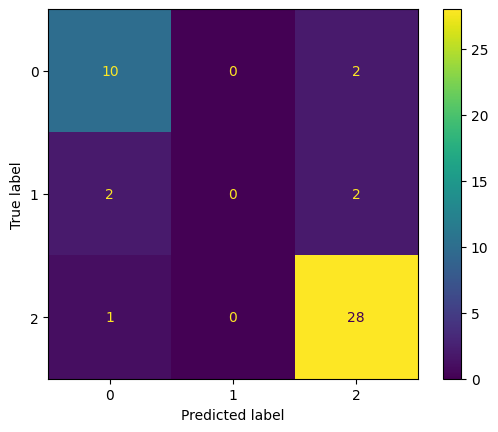

In [262]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plot.plot()
plt.show()

In [16]:
vocabulary = tfidf_vectorizer.get_feature_names_out()

In [34]:
weights = clf.coef_   # clf är min tränade klassificerare

In [35]:
weights

array([[-0.00335532,  0.00405672, -0.00296049, ...,  0.01066027,
         0.00792541, -0.0026906 ],
       [-0.00294181, -0.00478656, -0.00272883, ..., -0.00451152,
        -0.00243624, -0.00885761],
       [ 0.00629713,  0.00072985,  0.00568932, ..., -0.00614875,
        -0.00548917,  0.01154821]])

In [36]:
def get_n_most_important_words(weights, vocabulary, n):
    indices = np.argpartition(weights, len(weights) - n)[-n:]
    min_elements = weights[indices]
    min_elements_order = np.argsort(min_elements)
    ordered_indices = indices[min_elements_order]
    words = [vocabulary[i] for i in ordered_indices]
    weights = [round(weights[i], 5) for i in ordered_indices]

    return words[::-1], weights[::-1]

In [44]:
print("Top 25 important words for classifying neutral bulletins:")
neutr_words, neutr_weights = get_n_most_important_words(weights[0], vocabulary, 25)
for word, weight in list(zip(neutr_words, neutr_weights)):
    print(f"{word}: {weight}")
print("\nTop 25 important words for classifying female bulletins:")
fem_words, fem_weights = get_n_most_important_words(weights[1], vocabulary, 25)
for word, weight in list(zip(fem_words, fem_weights)):
    print(f"{word}: {weight}")
print("\nTop 25 important words for classifying male bulletins:")
masc_words, masc_weights = get_n_most_important_words(weights[2], vocabulary, 25)
for word, weight in list(zip(masc_words, masc_weights)):
    print(f"{word}: {weight}")

Top 25 important words for classifying neutral bulletins:
financial: 0.3774
art: 0.37713
management: 0.28097
analyst: 0.25598
committee: 0.25569
qualify: 0.25398
animal: 0.2365
graphic: 0.21804
questionnaire: 0.21455
public: 0.21301
expert: 0.20972
degree: 0.19521
relation: 0.19423
recreation: 0.19408
analysis: 0.18755
professional: 0.16166
buyer: 0.15846
utility: 0.15681
business: 0.15255
administration: 0.15081
manager: 0.12759
purchase: 0.12738
accountant: 0.12575
laboratory: 0.12463
risk: 0.1205

Top 25 important words for classifying female bulletins:
volunteer: 0.9277
customer: 0.90618
compensation: 0.47141
accounting: 0.46368
dispatch: 0.36084
representative: 0.33546
telephone: 0.33084
claim: 0.31234
account: 0.29077
worker: 0.28739
coordinator: 0.27027
clerical: 0.25674
radio: 0.23324
bookkeeping: 0.2295
operator: 0.22808
payment: 0.22286
clerk: 0.21524
multiple: 0.2057
billing: 0.20314
assist: 0.1947
center: 0.18966
service: 0.18745
communication: 0.1828
assistant: 0.17593
ste